
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [26]:
my_cols = pd.read_csv('./data/heart_disease/columns.csv', skipinitialspace=True).column.values.tolist()
my_data = pd.read_csv('./data/heart_disease/processed.cleveland.data', 
                      delimiter=',',
                      header=0,
                      names = my_cols
                      )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [27]:
my_data.shape

(302, 14)

In [28]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [31]:
my_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [32]:
my_data = my_data.replace('?',np.nan)
my_data = my_data.apply(pd.to_numeric)

In [33]:
my_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [34]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  num       302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [35]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [36]:
my_data["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

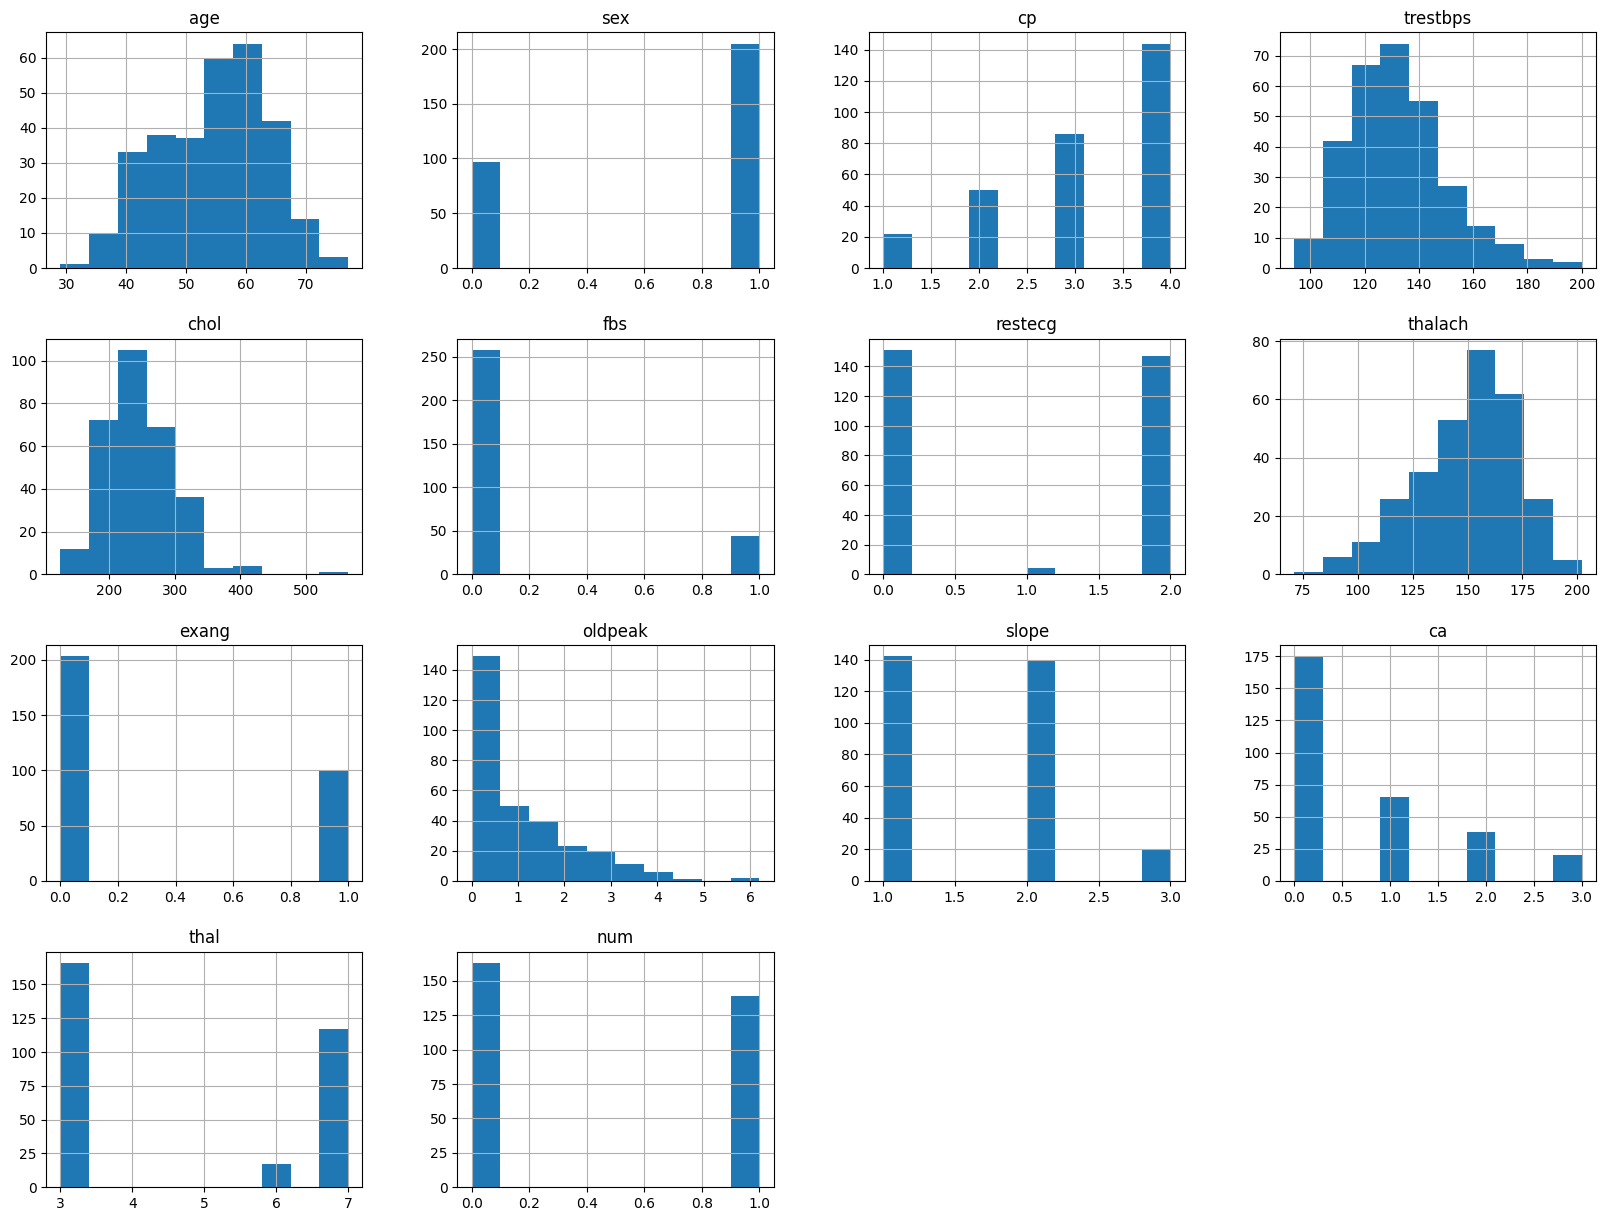

In [44]:
my_data.hist(figsize=(20,15))

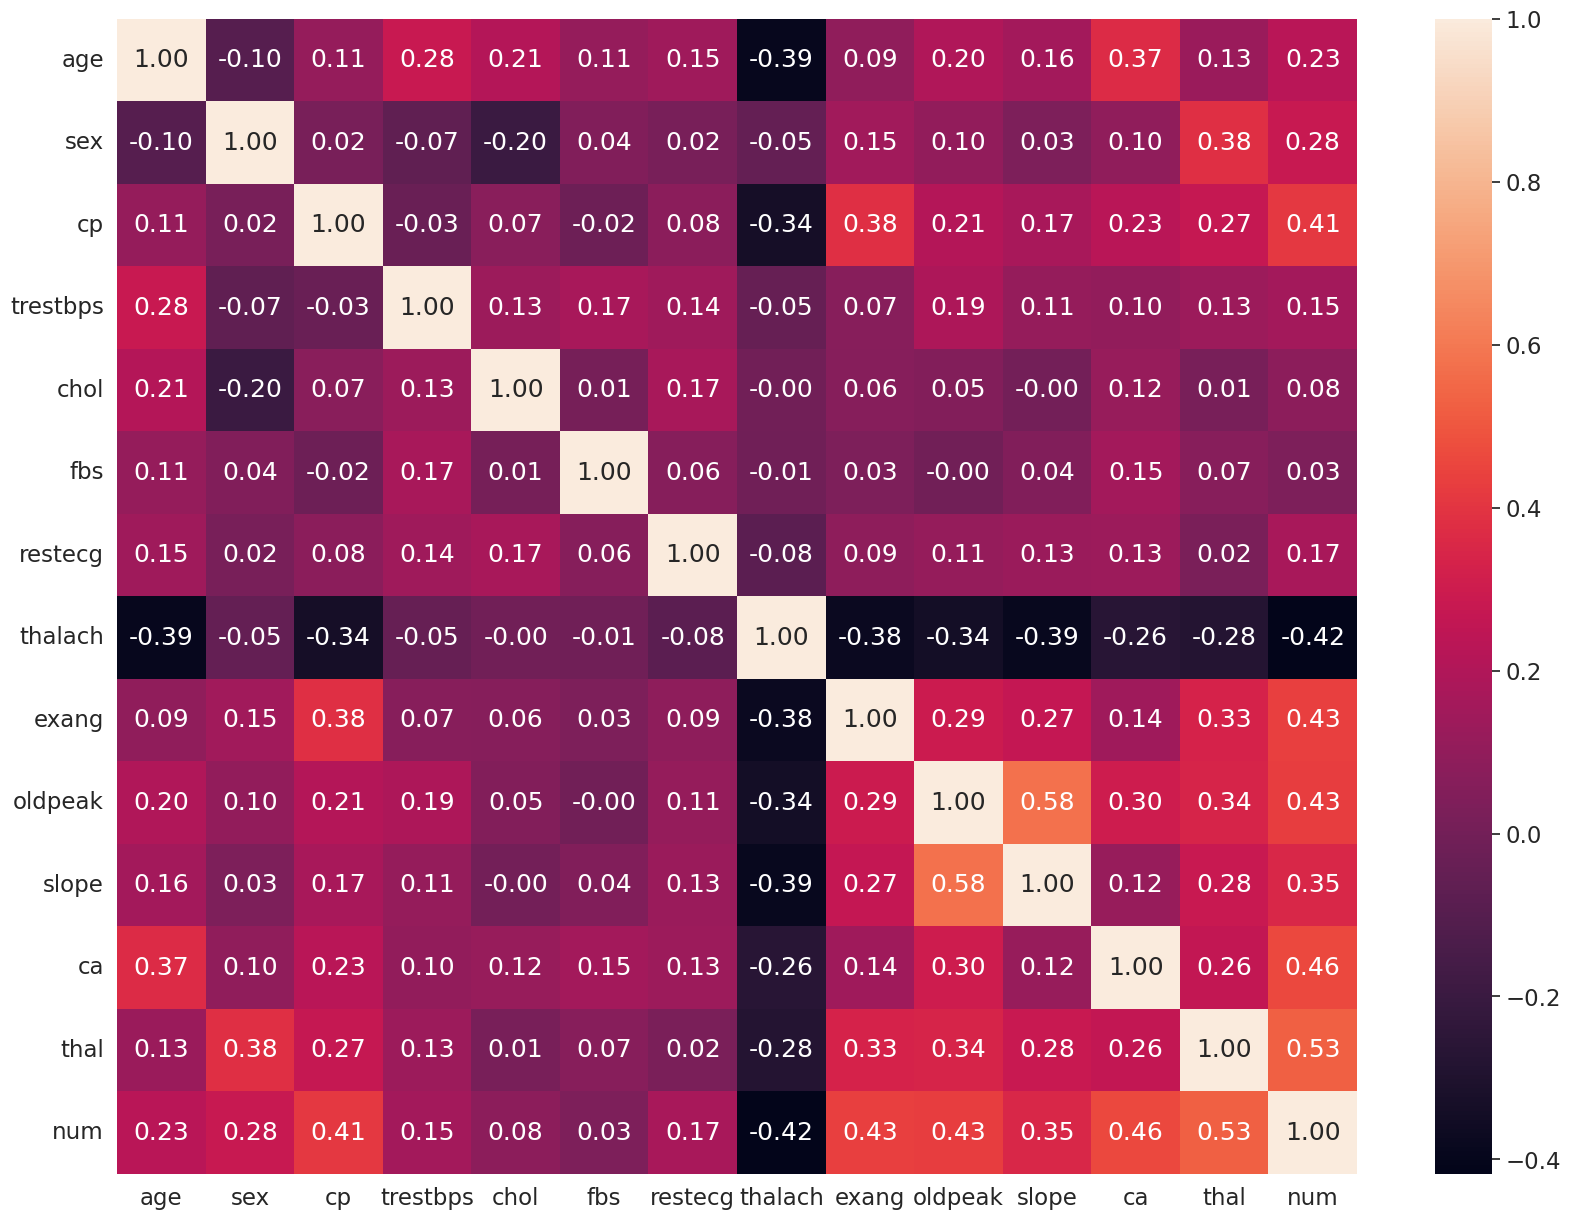

In [47]:
fig, ax1 = plt.subplots(1, figsize=(20, 15))
corr = my_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
sns.set(font_scale=1.5)

In [48]:
X = my_data.drop(['num'], axis=1)
y = my_data['num']

In [49]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

In [51]:
RANDOM_STATE = 17
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

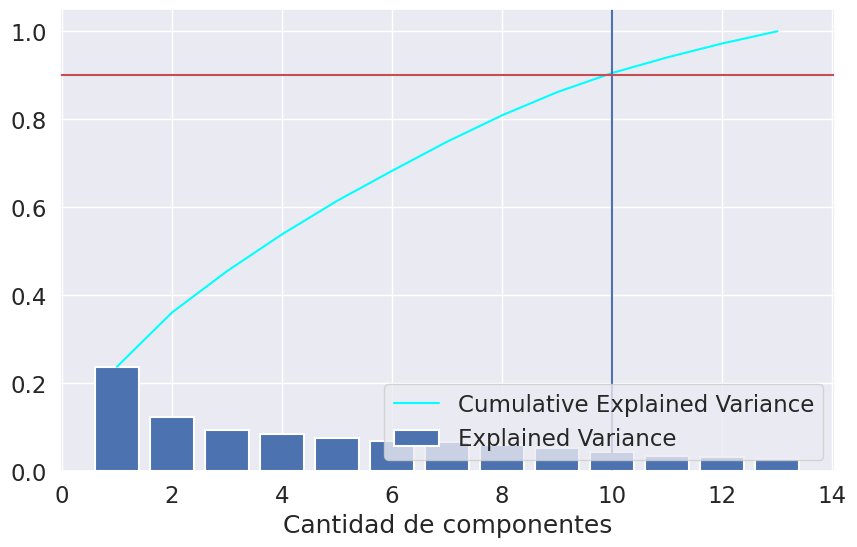

In [73]:
pca_2 = PCA(n_components=13, random_state=RANDOM_STATE).fit(X_scaled)
fig, ax = plt.subplots(figsize=(10,6))
x_values = range(1, pca_2.n_components_+1)
ax.bar(x_values, pca_2.explained_variance_ratio_, lw=1.5, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca_2.explained_variance_ratio_), lw=1.5, label='Cumulative Explained Variance', color='cyan')
plt.axvline(10, c='b')
plt.axhline(0.9, c='r')
ax.set_xlabel('Cantidad de componentes')
plt.legend(loc=4)
plt.show()

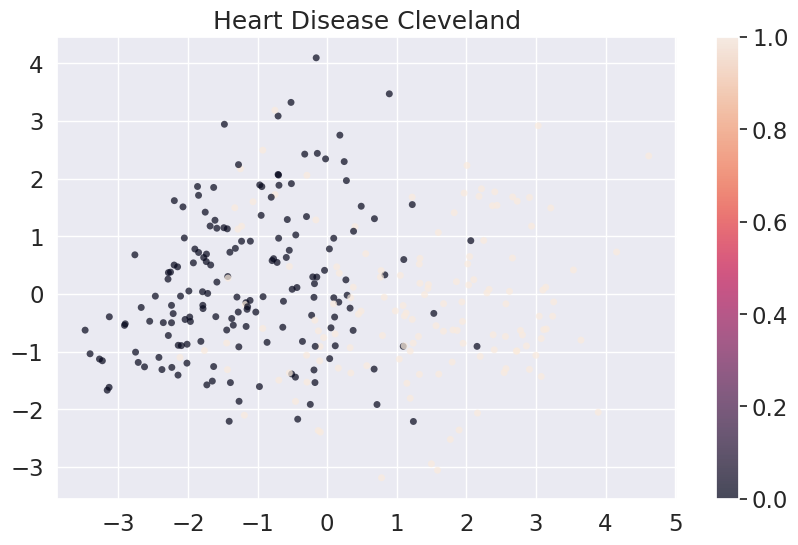

In [77]:
plt.figure(figsize=(10,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, edgecolor='none', alpha=0.7, s=25)
plt.colorbar()

plt.title('Heart Disease Cleveland');

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [88]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

In [84]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, test_size = 0.2, shuffle = True)

* ElasticNet

In [135]:
eNet = ElasticNet()
eNet.fit(X_train, y_train)
y_prediction = eNet.predict(X_test)
print('score:', round(eNet.score(X_test, y_test), 3))
print('mse:', round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))

score: 0.098
mse: 0.223
r2: 0.098


* ElasticNetCV

In [142]:
eNet_cv = ElasticNetCV(cv=10)
eNet_cv.fit(X_train, y_train)
y_prediction = eNet_cv.predict(X_test)
print('\nscore:', round(eNet_cv.score(X_test, y_test),3))
print('mse:',round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))


score: 0.605
mse: 0.097
r2: 0.605


* LogisticRegression

In [138]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
y_prediction = log_regression.predict(X_test)
print('\nscore:', round(log_regression.score(X_test, y_test),3))
print('mse:', round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))


score: 0.902
mse: 0.098
r2: 0.601


* LogisticRegressionCV

In [139]:
log_regression_cv = LogisticRegressionCV(cv=10)
log_regression_cv.fit(X_train, y_train)
y_prediction = log_regression_cv.predict(X_test)
print('\n\nscore:', round(log_regression_cv.score(X_test, y_test),3))
print('mse:',round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))



score: 0.885
mse: 0.115
r2: 0.535


* SGDClassifier

In [140]:
sgdClass = SGDClassifier()
sgdClass.fit(X_train, y_train)
y_prediction = sgdClass.predict(X_test)
print('score:', round(sgdClass.score(X_test, y_test),3))
print('mse:', round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))


score: 0.82
mse: 0.18
r2: 0.269


SGDRegressor

In [153]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
y_prediction = sgd_regressor.predict(X_test)
print('score:', round(sgd_regressor.score(X_test, y_test),3))
print('mse:',round(metrics.mean_squared_error(y_test, y_prediction),3))
print('r2:', round(metrics.r2_score(y_test, y_prediction),3))

score: 0.603
mse: 0.098
r2: 0.603


In [151]:
print("El modelo con mayor score es LogisticRegression con score:",round(log_regression.score(X_test, y_test),3),
      "y menor error cuadrático medio mse:",round(metrics.mean_squared_error(y_test, y_prediction),3))

El modelo con mayor score es LogisticRegression con score: 0.902 y menor error cuadrático medio mse: 0.097
